In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install kaggle

In [ ]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rohan0301/unsupervised-learning-on-country-data

  0% 0.00/5.21k [00:00<?, ?B/s]
100% 5.21k/5.21k [00:00<00:00, 9.45MB/s]


In [ ]:
!ls

kaggle.json  sample_data  unsupervised-learning-on-country-data.zip


In [ ]:
!unzip unsupervised-learning-on-country-data.zip

Archive:  unsupervised-learning-on-country-data.zip
  inflating: Country-data.csv        
  inflating: data-dictionary.csv     


In [ ]:
df=pd.read_csv("/content/Country-data.csv")

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
column_des=pd.read_csv('data-dictionary.csv')

In [ ]:
for i in range(10):
  print(f'{column_des.iloc[i,0]}::\t{column_des.iloc[i,1]}')

country::	Name of the country
child_mort::	Death of children under 5 years of age per 1000 live births
exports::	Exports of goods and services per capita. Given as %age of the GDP per capita
health::	Total health spending per capita. Given as %age of GDP per capita
imports::	Imports of goods and services per capita. Given as %age of the GDP per capita
Income::	Net income per person
Inflation::	The measurement of the annual growth rate of the Total GDP
life_expec::	The average number of years a new born child would live if the current mortality patterns are to remain the same
total_fer::	The number of children that would be born to each woman if the current age-fertility rates remain the same.
gdpp::	The GDP per capita. Calculated as the Total GDP divided by the total population.


In [ ]:
df.shape

(167, 10)

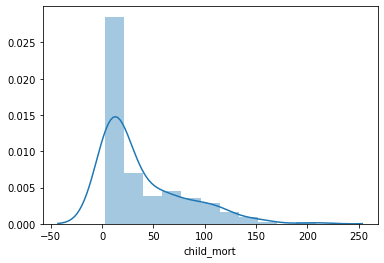

In [ ]:
sn.distplot(df['child_mort'])

we can from given data there are some cases where more than 150 children who are below age of 5 are dying per 1000 live births.

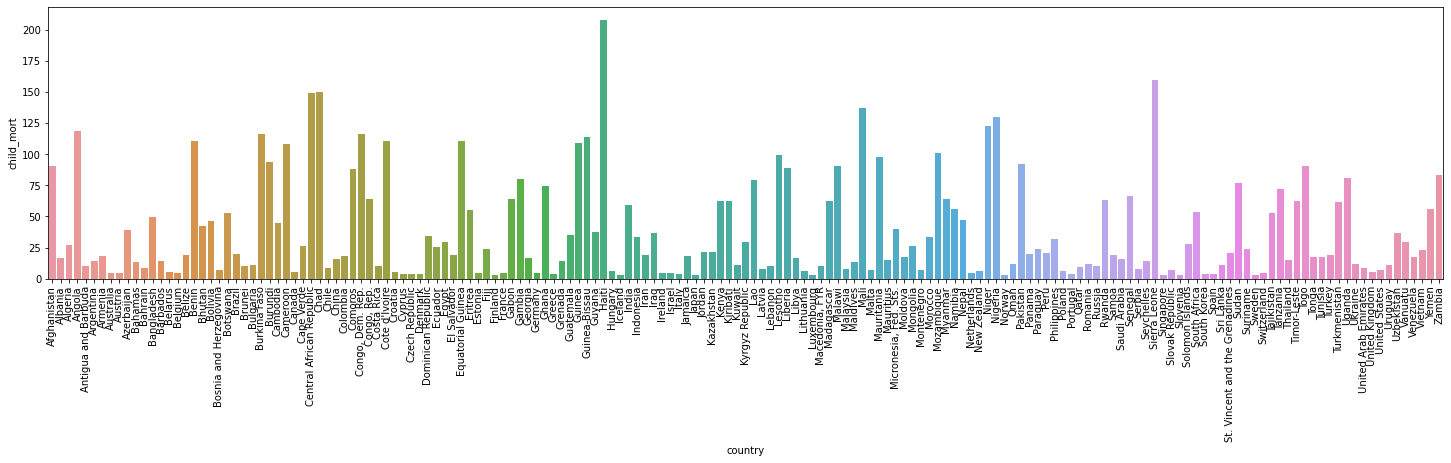

In [ ]:
plt.figure(figsize=(25,5))
sn.barplot(df['country'],df['child_mort'])
plt.xticks(rotation=90)
plt.show()

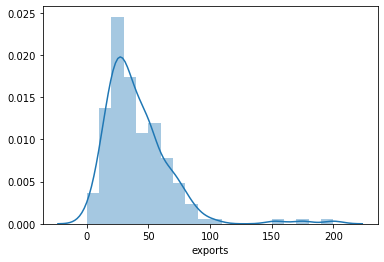

In [ ]:
sn.distplot(df['exports'])

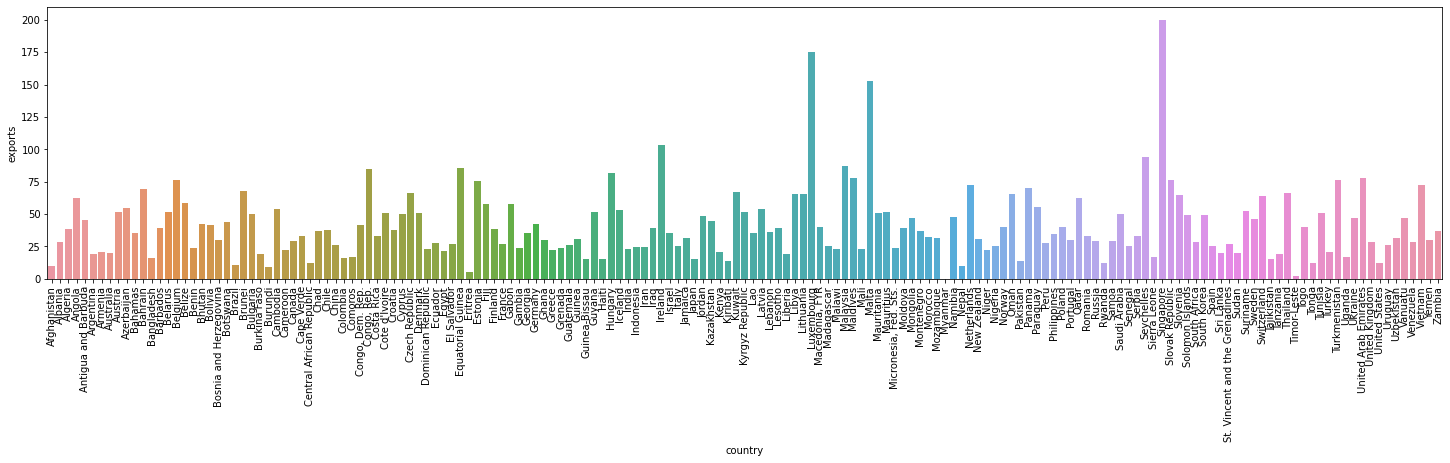

In [ ]:
plt.figure(figsize=(25,5))
sn.barplot(df['country'],df['exports'])
plt.xticks(rotation=90)
plt.show()

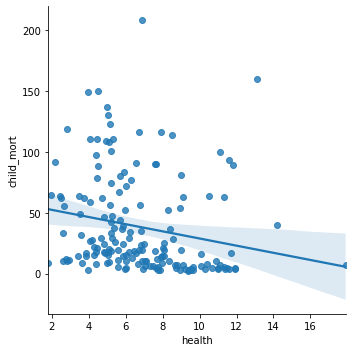

In [ ]:
sn.lmplot(y='child_mort',x='health',data=df)

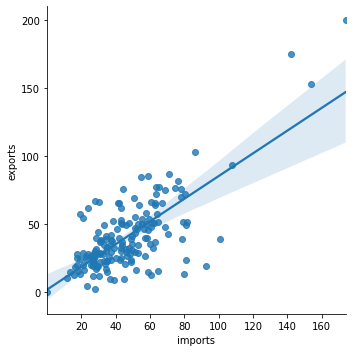

In [ ]:
sn.lmplot(x='imports',y='exports',data=df)

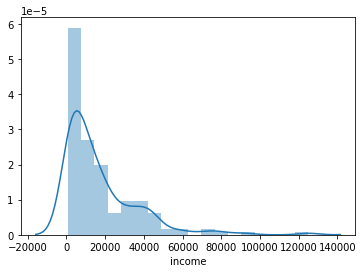

In [ ]:
sn.distplot(df['income'])

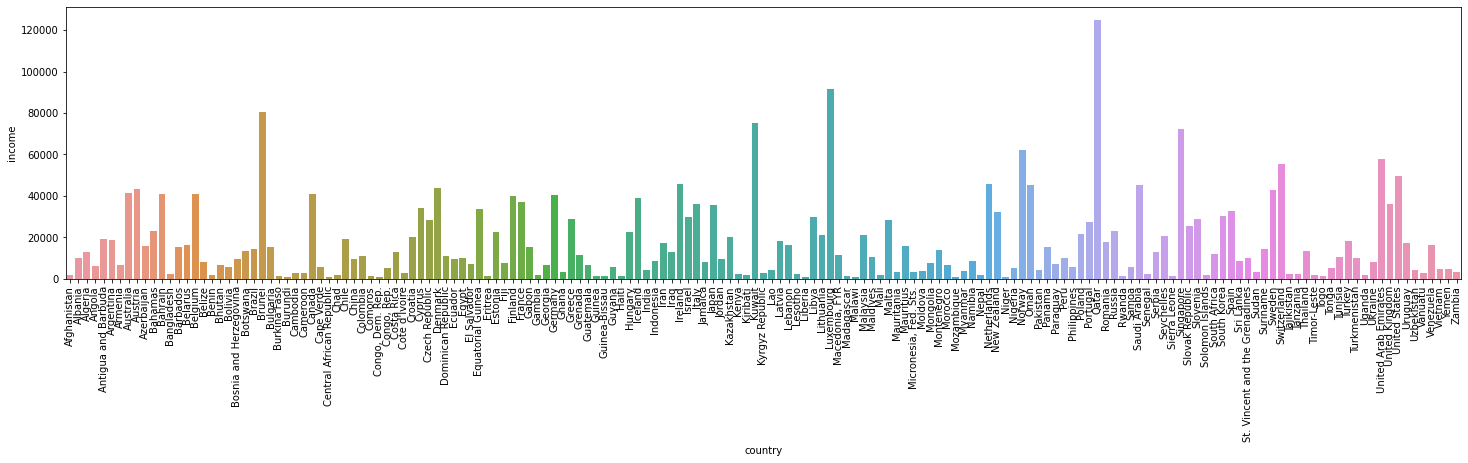

In [ ]:
plt.figure(figsize=(25,5))
sn.barplot(df['country'],df['income'])
plt.xticks(rotation=90)
plt.show()

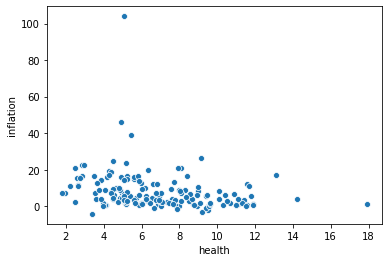

In [ ]:
sn.scatterplot(df['health'],df['inflation'])

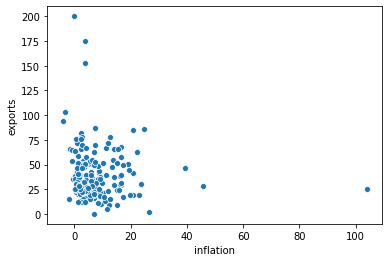

In [ ]:
sn.scatterplot(y=df['exports'],x=df['inflation'])

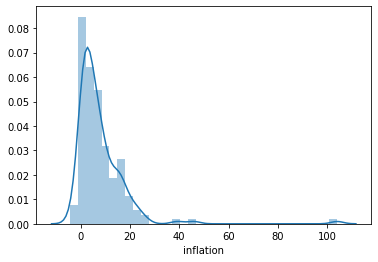

In [ ]:
sn.distplot(df['inflation'])

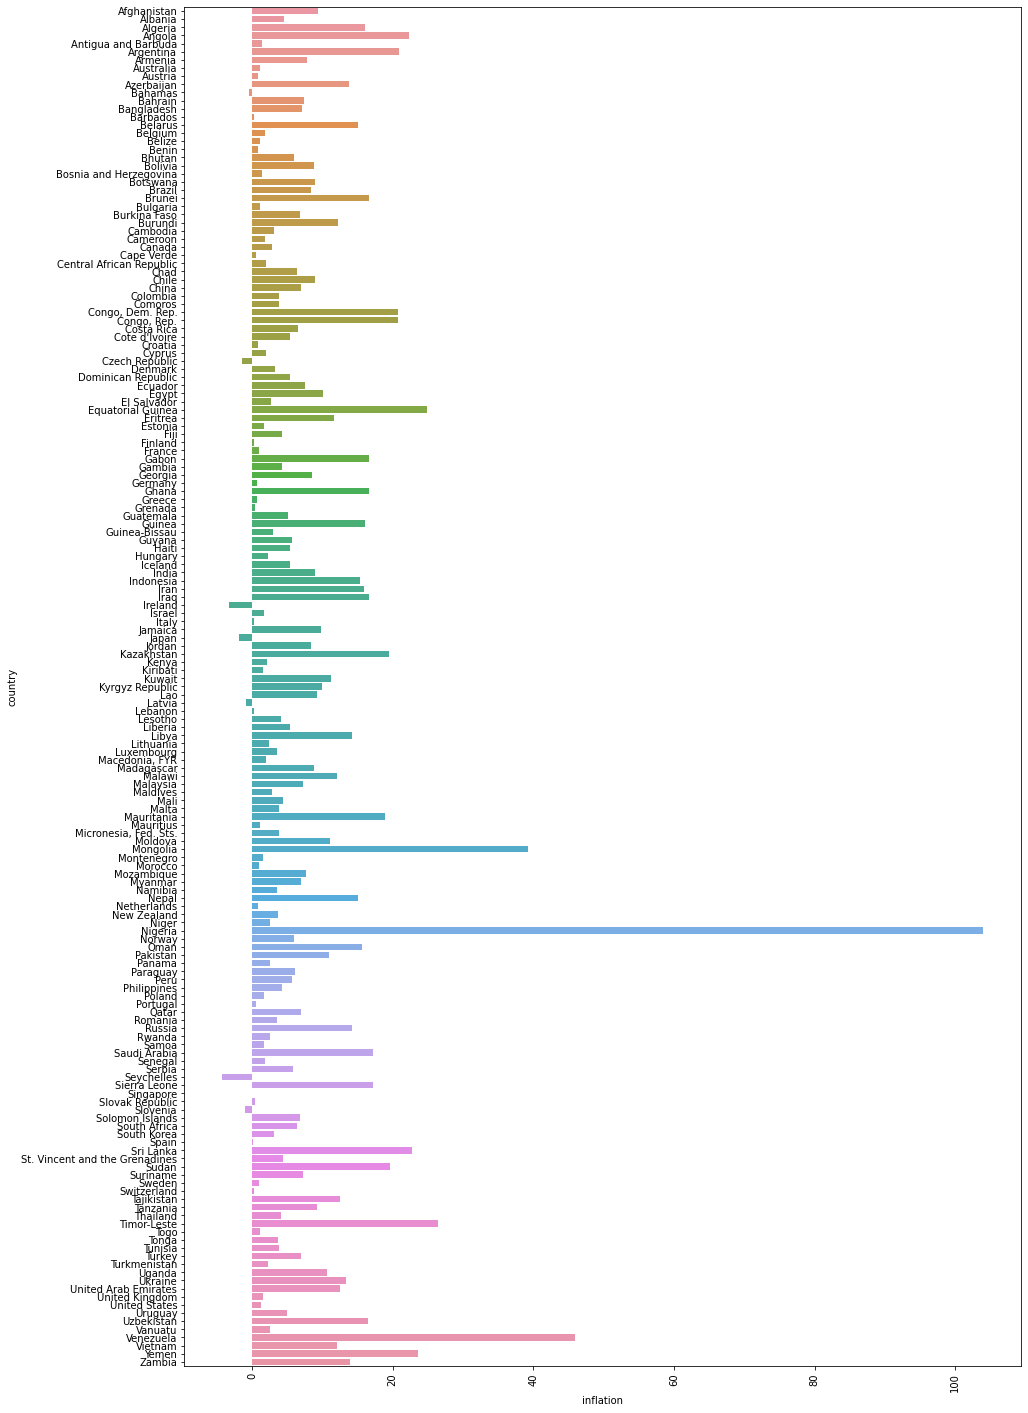

In [ ]:
plt.figure(figsize=(15,25))
sn.barplot(df['inflation'],df['country'])
plt.xticks(rotation=90)
plt.show()

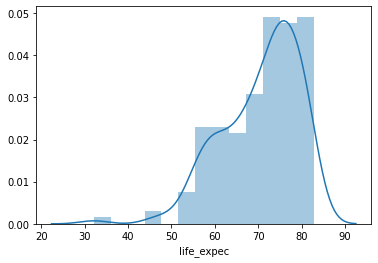

In [ ]:
sn.distplot(df['life_expec'])

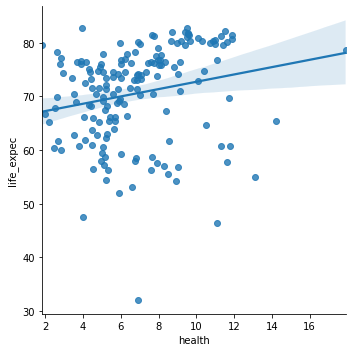

In [ ]:
sn.lmplot(x='health',y='life_expec',data=df)

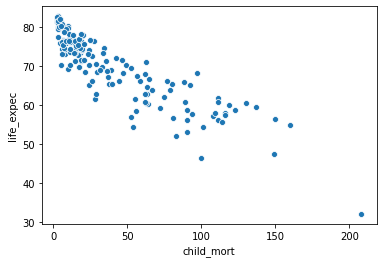

In [ ]:
sn.scatterplot(df['child_mort'],df['life_expec'])

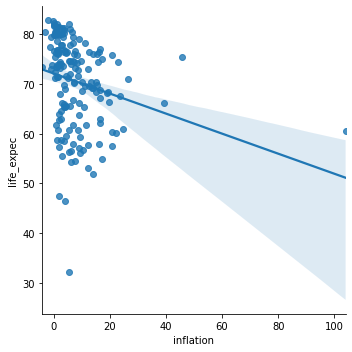

In [ ]:
sn.lmplot(x='inflation',y='life_expec',data=df)

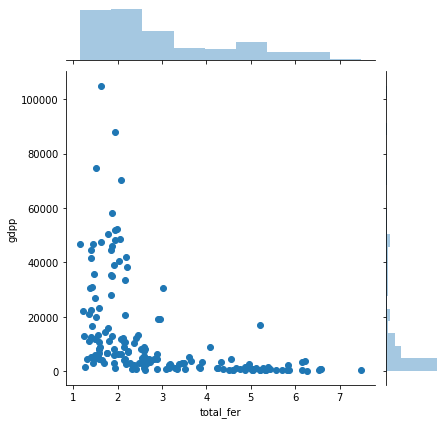

In [ ]:
sn.jointplot(x='total_fer',y='gdpp',data=df)

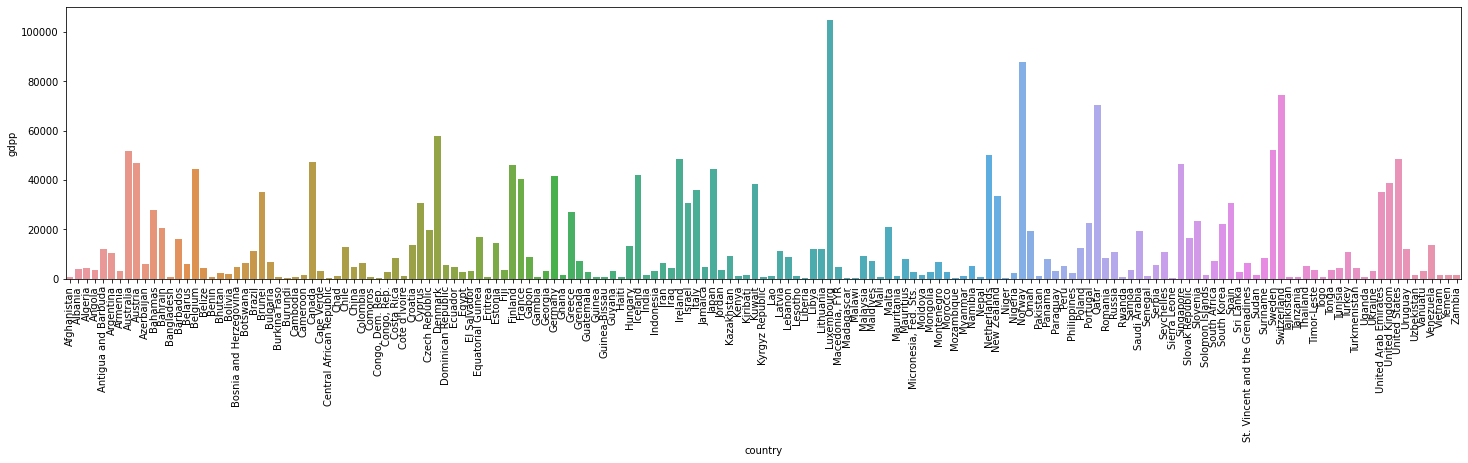

In [ ]:
plt.figure(figsize=(25,5))
sn.barplot(df['country'],df['gdpp'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df.drop('country',axis=1,inplace=True)

In [ ]:
scaler=MinMaxScaler()

In [ ]:
train=scaler.fit_transform(df)

In [ ]:
from sklearn.cluster import KMeans
from tqdm import tqdm

without pca

In [ ]:
l=[]
for i in tqdm(range(2,20)):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(train)
  l.append(kmeans.inertia_)



100%|██████████| 18/18 [00:01<00:00, 17.41it/s]


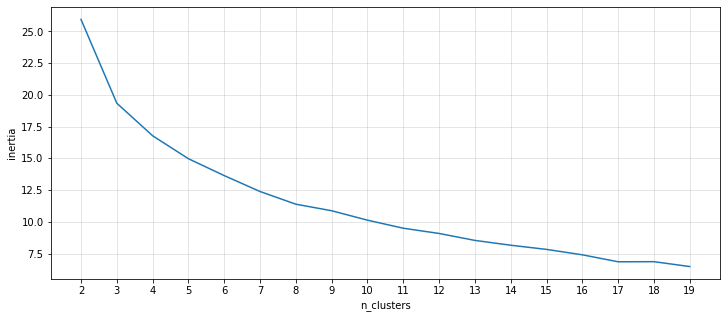

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(list(range(2,20)),l)
plt.grid(alpha=0.4)
plt.xticks(list(range(2,20)))
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
l=[]
for i in tqdm(range(2,20)):
  kmeans=KMeans(n_clusters=i)
  preds=kmeans.fit_predict(train)
  l.append(silhouette_score(train,preds))

100%|██████████| 18/18 [00:01<00:00, 11.39it/s]


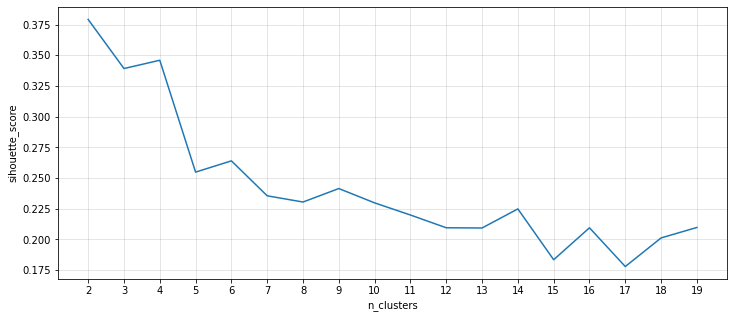

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(list(range(2,20)),l)
plt.grid(alpha=0.4)
plt.xticks(list(range(2,20)))
plt.xlabel('n_clusters')
plt.ylabel('sihouette_score')
plt.show()

with pca

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=8)
pca.fit_transform(train)

array([[-0.59907764,  0.09549001,  0.15755381, ..., -0.04653208,
         0.07680289,  0.04060966],
       [ 0.1584743 , -0.2120924 , -0.064189  , ..., -0.01024615,
        -0.04356663,  0.03084184],
       [ 0.00368552, -0.13586725, -0.13418203, ...,  0.02598836,
        -0.0456037 , -0.01019769],
       ...,
       [ 0.11551228, -0.03203381, -0.19524301, ...,  0.08923711,
        -0.03974308, -0.00612366],
       [-0.33296825, -0.0198243 , -0.02998903, ...,  0.06325383,
         0.01251879,  0.01423106],
       [-0.57389669,  0.10878814,  0.03255232, ...,  0.01323311,
         0.13741331, -0.05371468]])

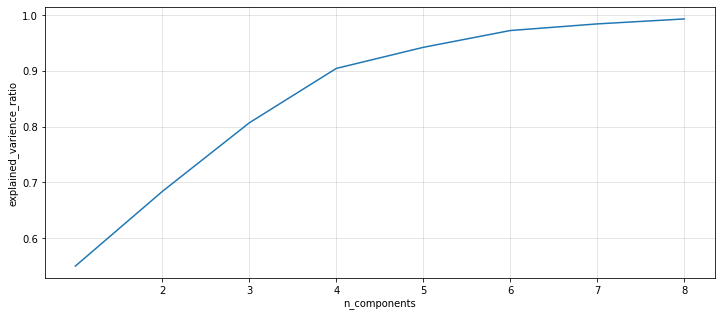

In [ ]:
l=np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(12,5))
plt.plot(list(range(1,9)),l)
plt.grid(alpha=0.4)
plt.xticks(list(range(2,9)))
plt.xlabel('n_components')
plt.ylabel('explained_varience_ratio')
plt.show()

In [ ]:
final_pca=PCA(n_components=4)
pca_train=final_pca.fit_transform(train)

In [ ]:
l=[]
for i in tqdm(range(2,15)):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(pca_train)
  l.append(kmeans.inertia_)

100%|██████████| 13/13 [00:00<00:00, 19.47it/s]


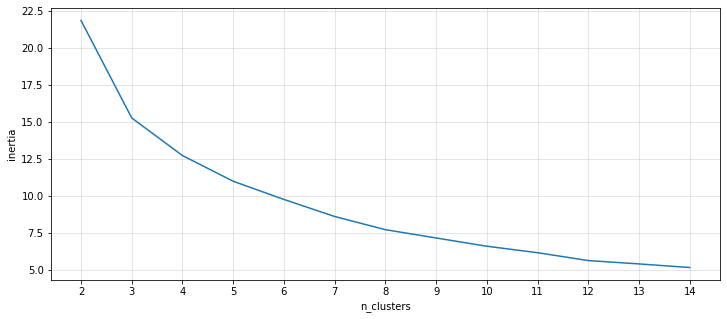

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(list(range(2,15)),l)
plt.grid(alpha=0.4)
plt.xticks(list(range(2,15)))
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(pca_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

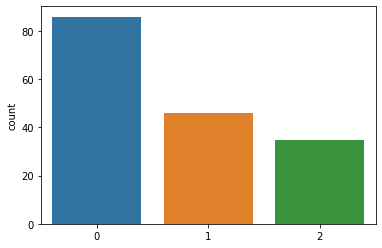

In [ ]:
sn.countplot(kmeans.labels_)

100%|██████████| 13/13 [00:00<00:00, 14.33it/s]


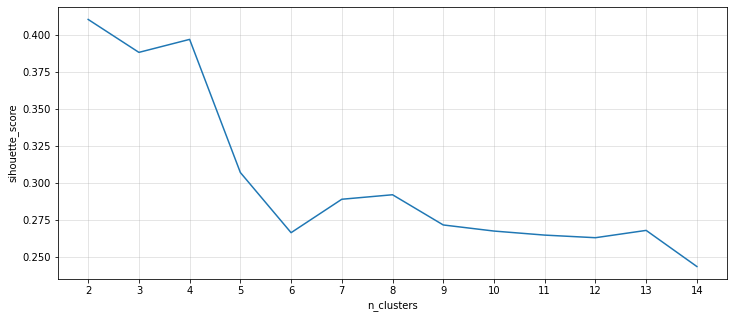

In [ ]:
l=[]
for i in tqdm(range(2,15)):
  kmeans=KMeans(n_clusters=i)
  preds=kmeans.fit_predict(pca_train)
  l.append(silhouette_score(pca_train,preds))
plt.figure(figsize=(12,5))
plt.plot(list(range(2,15)),l)
plt.grid(alpha=0.4)
plt.xticks(list(range(2,15)))
plt.xlabel('n_clusters')
plt.ylabel('sihouette_score')
plt.show()

from here we see si...score is higher for 2 clusters

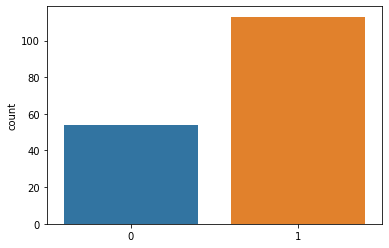

In [ ]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(pca_train)
sn.countplot(kmeans.labels_)